In [1]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("startup_data_1.csv")

In [3]:
df.columns

Index(['Unnamed: 0', 'state_code', 'latitude', 'longitude', 'zip_code', 'id',
       'city', 'Unnamed: 6', 'name', 'labels', 'founded_at', 'closed_at',
       'first_funding_at', 'last_funding_at', 'age_first_funding_year',
       'age_last_funding_year', 'age_first_milestone_year',
       'age_last_milestone_year', 'relationships', 'funding_rounds',
       'funding_total_usd', 'milestones', 'state_code.1', 'is_CA', 'is_NY',
       'is_MA', 'is_TX', 'is_otherstate', 'category_code', 'is_software',
       'is_web', 'is_mobile', 'is_enterprise', 'is_advertising',
       'is_gamesvideo', 'is_ecommerce', 'is_biotech', 'is_consulting',
       'is_othercategory', 'object_id', 'has_VC', 'has_angel', 'has_roundA',
       'has_roundB', 'has_roundC', 'has_roundD', 'avg_participants',
       'is_top500', 'status'],
      dtype='object')

In [4]:
df.isna().sum()

Unnamed: 0                    0
state_code                    0
latitude                      0
longitude                     0
zip_code                      0
id                            0
city                          0
Unnamed: 6                  493
name                          0
labels                        0
founded_at                    0
closed_at                   588
first_funding_at              0
last_funding_at               0
age_first_funding_year        0
age_last_funding_year         0
age_first_milestone_year    152
age_last_milestone_year     152
relationships                 0
funding_rounds                0
funding_total_usd             0
milestones                    0
state_code.1                  1
is_CA                         0
is_NY                         0
is_MA                         0
is_TX                         0
is_otherstate                 0
category_code                 0
is_software                   0
is_web                        0
is_mobil

In [5]:
df.shape

(923, 49)

In [6]:
type(df["closed_at"][0])

float

In [7]:
df["closed_at"][5]

'2/15/2009'

In [8]:
def convert_to_date(date_string):
    return datetime.strptime(date_string, '%m/%d/%Y').date()

In [9]:
df['founded_at'] = df['founded_at'].apply(convert_to_date)

In [10]:
df["closed_at"].head()

0          NaN
1          NaN
2          NaN
3          NaN
4    10/1/2012
Name: closed_at, dtype: object

In [11]:
df = df.drop(["closed_at"], axis = 1)

In [12]:
df = df.drop(["Unnamed: 6"], axis = 1)

In [13]:
df.isna().sum()

Unnamed: 0                    0
state_code                    0
latitude                      0
longitude                     0
zip_code                      0
id                            0
city                          0
name                          0
labels                        0
founded_at                    0
first_funding_at              0
last_funding_at               0
age_first_funding_year        0
age_last_funding_year         0
age_first_milestone_year    152
age_last_milestone_year     152
relationships                 0
funding_rounds                0
funding_total_usd             0
milestones                    0
state_code.1                  1
is_CA                         0
is_NY                         0
is_MA                         0
is_TX                         0
is_otherstate                 0
category_code                 0
is_software                   0
is_web                        0
is_mobile                     0
is_enterprise                 0
is_adver

In [14]:
df.shape

(923, 47)

In [15]:
df = df.dropna()

In [16]:
df.shape

(770, 47)

array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'labels'}>,
        <Axes: title={'center': 'age_first_funding_year'}>,
        <Axes: title={'center': 'age_last_funding_year'}>],
       [<Axes: title={'center': 'age_first_milestone_year'}>,
        <Axes: title={'center': 'age_last_milestone_year'}>,
        <Axes: title={'center': 'relationships'}>,
        <Axes: title={'center': 'funding_rounds'}>,
        <Axes: title={'center': 'funding_total_usd'}>,
        <Axes: title={'center': 'milestones'}>],
       [<Axes: title={'center': 'is_CA'}>,
        <Axes: title={'center': 'is_NY'}>,
        <Axes: title={'center': 'is_MA'}>,
        <Axes: title={'center': 'is_TX'}>,
        <Axes: title={'center': 'is_otherstate'}>,
        <Axes: title={'center': 'is_software'}>],
       [<Axes: title={'center': 'is_web'}>,
        <Axes: title={'center': 'is_mobile'}>,
 

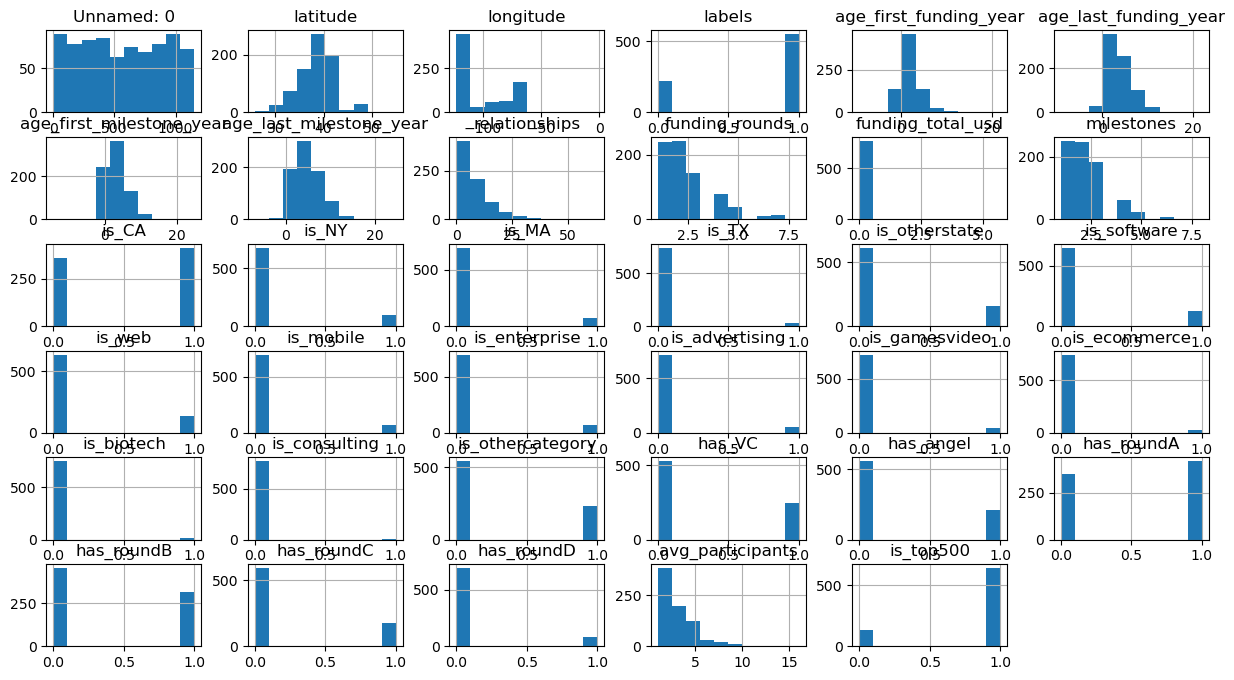

In [17]:
df.hist(figsize = (15,8))

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 770 entries, 0 to 922
Data columns (total 47 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                770 non-null    int64  
 1   state_code                770 non-null    object 
 2   latitude                  770 non-null    float64
 3   longitude                 770 non-null    float64
 4   zip_code                  770 non-null    object 
 5   id                        770 non-null    object 
 6   city                      770 non-null    object 
 7   name                      770 non-null    object 
 8   labels                    770 non-null    int64  
 9   founded_at                770 non-null    object 
 10  first_funding_at          770 non-null    object 
 11  last_funding_at           770 non-null    object 
 12  age_first_funding_year    770 non-null    float64
 13  age_last_funding_year     770 non-null    float64
 14  age_first_

/var/folders/81/7z5hxt0d3cbd95svhrc31swh0000gn/T/ipykernel_20210/2443189700.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True, cmap = "YlGnBu")


<Axes: >

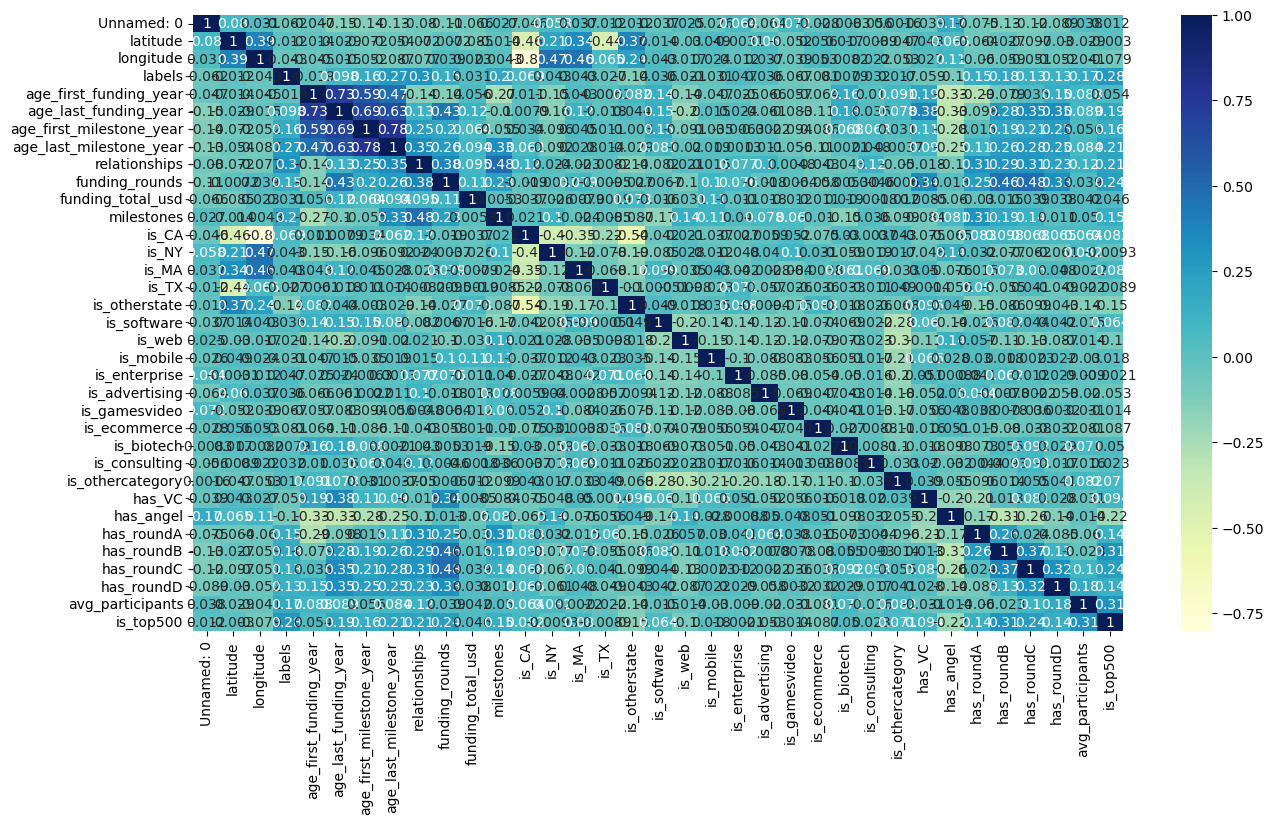

In [19]:
plt.figure(figsize = (15,8))
sns.heatmap(df.corr(), annot = True, cmap = "YlGnBu")

In [20]:
df.corr()

/var/folders/81/7z5hxt0d3cbd95svhrc31swh0000gn/T/ipykernel_20210/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Unnamed: 0,latitude,longitude,labels,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,...,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500
Unnamed: 0,1.000000,0.079843,0.030950,-0.062191,-0.046827,-0.150768,-0.136153,-0.133897,-0.080026,-0.113986,...,-0.055502,0.001578,-0.038798,0.167008,-0.075359,-0.129483,-0.121479,-0.088541,0.037632,0.011645
latitude,0.079843,1.000000,0.388261,-0.012196,-0.013849,-0.028697,-0.071944,-0.053930,-0.071861,-0.007201,...,-0.008922,-0.047310,0.043121,0.065407,-0.063727,-0.027307,-0.097093,-0.029522,-0.028517,-0.002962
longitude,0.030950,0.388261,1.000000,-0.042727,-0.045433,-0.014502,-0.051538,-0.086810,-0.077022,0.038816,...,0.021504,-0.052906,0.026746,0.105066,-0.060339,-0.058961,-0.051410,-0.051505,-0.041325,-0.078651
labels,-0.062191,-0.012196,-0.042727,1.000000,-0.018821,0.097909,0.162850,0.268324,0.304694,0.154917,...,0.032275,0.017049,-0.059206,-0.103744,0.152515,0.182841,0.133723,0.128579,0.173704,0.276781
age_first_funding_year,-0.046827,-0.013849,-0.045433,-0.018821,1.000000,0.729905,0.593524,0.472212,-0.144770,-0.142716,...,0.010075,0.091202,0.185110,-0.333113,-0.286729,-0.078607,0.034542,0.149454,0.087822,0.053836
age_last_funding_year,-0.150768,-0.028697,-0.014502,0.097909,0.729905,1.000000,0.687576,0.632676,0.126851,0.431500,...,0.035901,0.077764,0.375499,-0.334081,-0.098071,0.279210,0.347002,0.345158,0.088717,0.190563
age_first_milestone_year,-0.136153,-0.071944,-0.051538,0.162850,0.593524,0.687576,1.000000,0.777741,0.245309,0.195271,...,0.063377,0.031399,0.109732,-0.278914,0.014808,0.190772,0.209225,0.253209,0.055742,0.155264
age_last_milestone_year,-0.133897,-0.053930,-0.086810,0.268324,0.472212,0.632676,0.777741,1.000000,0.348090,0.262533,...,0.047689,-0.003666,0.090471,-0.248890,0.112340,0.260730,0.279668,0.253194,0.083746,0.206459
relationships,-0.080026,-0.071861,-0.077022,0.304694,-0.144770,0.126851,0.245309,0.348090,1.000000,0.375917,...,0.123869,-0.050457,-0.018356,-0.104520,0.309604,0.289361,0.305870,0.228057,0.116260,0.213545
funding_rounds,-0.113986,-0.007201,0.038816,0.154917,-0.142716,0.431500,0.195271,0.262533,0.375917,1.000000,...,0.004598,-0.000666,0.344896,0.012705,0.248891,0.460553,0.480826,0.328928,0.039142,0.242894


In [21]:
# check for highly correlated features and drop them
# normalize features

In [22]:
df["status"].value_counts()

acquired    550
closed      220
Name: status, dtype: int64

In [23]:
#convert status column to binary
def convert_to_binary(text):
    if text == "acquired":
        return 1
    return 0

In [24]:
df["status"] = df["status"].apply(convert_to_binary)

In [25]:
df.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,name,labels,founded_at,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,Bandsintown,1,2007-01-01,...,c:6669,0,1,0,0,0,0,1.0000,0,1
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,TriCipher,1,2000-01-01,...,c:16283,1,0,0,1,1,1,4.7500,1,1
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,Plixi,1,2009-03-18,...,c:65620,0,0,1,0,0,0,4.0000,1,1
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Solidcore Systems,1,2002-01-01,...,c:42668,0,0,0,1,1,1,3.3333,1,1
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,Inhale Digital,0,2010-08-01,...,c:65806,1,1,0,0,0,0,1.0000,1,0


In [26]:
X = df.drop(["status"], axis = 1)
y = df["status"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [27]:
df["city"].value_counts()

San Francisco       119
New York             82
Mountain View        39
Palo Alto            32
Austin               26
                   ... 
NW Atlanta            1
Solana Beach          1
Long Island City      1
Columbia              1
Bothell               1
Name: city, Length: 183, dtype: int64

In [28]:
#lg_model = LogisticRegression(random_state = 2)

In [29]:
#lg_model.fit(X_train, y_train)

In [30]:
# latitude and longitude and not as relevant when you have state and city info
df = df.drop(["latitude","longitude"],axis = 1)

In [31]:
df.shape

(770, 45)

In [32]:
df.head()

,Unnamed: 0,state_code,zip_code,id,city,name,labels,founded_at,first_funding_at,last_funding_at,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,92101,c:6669,San Diego,Bandsintown,1,2007-01-01,4/1/2009,1/1/2010,...,c:6669,0,1,0,0,0,0,1.0000,0,1
1,204,CA,95032,c:16283,Los Gatos,TriCipher,1,2000-01-01,2/14/2005,12/28/2009,...,c:16283,1,0,0,1,1,1,4.7500,1,1
2,1001,CA,92121,c:65620,San Diego,Plixi,1,2009-03-18,3/30/2010,3/30/2010,...,c:65620,0,0,1,0,0,0,4.0000,1,1
3,738,CA,95014,c:42668,Cupertino,Solidcore Systems,1,2002-01-01,2/17/2005,4/25/2007,...,c:42668,0,0,0,1,1,1,3.3333,1,1
4,1002,CA,94105,c:65806,San Francisco,Inhale Digital,0,2010-08-01,8/1/2010,4/1/2012,...,c:65806,1,1,0,0,0,0,1.0000,1,0


In [33]:
#one hot encoding
pd.get_dummies(df["city"])

,Acton,Addison,Alameda,Aliso Viejo,Andover,Annapolis,Arcadia,Arlington,Atlanta,Austin,...,Waltham,Washington,West Hollywood,Westford,Weston,Westport,Williamstown,Wilmington,Woburn,Zeeland
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
919,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
920,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
921,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
pd.get_dummies(df["state_code"])

,AR,AZ,CA,CO,CT,DC,FL,GA,ID,IL,...,OH,OR,PA,RI,TN,TX,UT,VA,WA,WI
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
919,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
920,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
921,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
df = df.drop(["id"],axis = 1)

In [36]:
df = df.drop(["name"],axis = 1)

In [37]:
df = df.drop(["state_code.1"],axis = 1)

In [38]:
df["category_code"].value_counts()

web                 134
software            121
mobile               73
enterprise           69
advertising          53
games_video          47
network_hosting      29
ecommerce            22
biotech              19
security             18
analytics            18
hardware             18
cleantech            17
semiconductor        17
public_relations     14
social               13
search               10
messaging            10
travel                8
news                  8
fashion               8
other                 7
music                 6
photo_video           6
finance               6
education             4
health                3
consulting            2
automotive            2
transportation        2
real_estate           2
medical               2
hospitality           1
sports                1
Name: category_code, dtype: int64

In [39]:
categories_one_hot_encoding = pd.get_dummies(df["category_code"])

In [40]:
#keep tracking of all industries is important
df = df.drop(["category_code", "is_software", "is_web", "is_mobile", "is_enterprise", "is_advertising", "is_gamesvideo", "is_ecommerce", "is_biotech", "is_consulting", "is_othercategory"], axis = 1)

In [41]:
df.shape

(770, 31)

In [42]:
df = pd.concat([df,categories_one_hot_encoding], axis = 1)

In [43]:
df.shape

(770, 65)

In [44]:
df.columns

Index(['Unnamed: 0', 'state_code', 'zip_code', 'city', 'labels', 'founded_at',
       'first_funding_at', 'last_funding_at', 'age_first_funding_year',
       'age_last_funding_year', 'age_first_milestone_year',
       'age_last_milestone_year', 'relationships', 'funding_rounds',
       'funding_total_usd', 'milestones', 'is_CA', 'is_NY', 'is_MA', 'is_TX',
       'is_otherstate', 'object_id', 'has_VC', 'has_angel', 'has_roundA',
       'has_roundB', 'has_roundC', 'has_roundD', 'avg_participants',
       'is_top500', 'status', 'advertising', 'analytics', 'automotive',
       'biotech', 'cleantech', 'consulting', 'ecommerce', 'education',
       'enterprise', 'fashion', 'finance', 'games_video', 'hardware', 'health',
       'hospitality', 'medical', 'messaging', 'mobile', 'music',
       'network_hosting', 'news', 'other', 'photo_video', 'public_relations',
       'real_estate', 'search', 'security', 'semiconductor', 'social',
       'software', 'sports', 'transportation', 'travel', 'web'

In [45]:
df = df.drop(['Unnamed: 0'], axis = 1)

In [46]:
df.columns

Index(['state_code', 'zip_code', 'city', 'labels', 'founded_at',
       'first_funding_at', 'last_funding_at', 'age_first_funding_year',
       'age_last_funding_year', 'age_first_milestone_year',
       'age_last_milestone_year', 'relationships', 'funding_rounds',
       'funding_total_usd', 'milestones', 'is_CA', 'is_NY', 'is_MA', 'is_TX',
       'is_otherstate', 'object_id', 'has_VC', 'has_angel', 'has_roundA',
       'has_roundB', 'has_roundC', 'has_roundD', 'avg_participants',
       'is_top500', 'status', 'advertising', 'analytics', 'automotive',
       'biotech', 'cleantech', 'consulting', 'ecommerce', 'education',
       'enterprise', 'fashion', 'finance', 'games_video', 'hardware', 'health',
       'hospitality', 'medical', 'messaging', 'mobile', 'music',
       'network_hosting', 'news', 'other', 'photo_video', 'public_relations',
       'real_estate', 'search', 'security', 'semiconductor', 'social',
       'software', 'sports', 'transportation', 'travel', 'web'],
      dtype

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 770 entries, 0 to 922
Data columns (total 64 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   state_code                770 non-null    object 
 1   zip_code                  770 non-null    object 
 2   city                      770 non-null    object 
 3   labels                    770 non-null    int64  
 4   founded_at                770 non-null    object 
 5   first_funding_at          770 non-null    object 
 6   last_funding_at           770 non-null    object 
 7   age_first_funding_year    770 non-null    float64
 8   age_last_funding_year     770 non-null    float64
 9   age_first_milestone_year  770 non-null    float64
 10  age_last_milestone_year   770 non-null    float64
 11  relationships             770 non-null    int64  
 12  funding_rounds            770 non-null    int64  
 13  funding_total_usd         770 non-null    int64  
 14  milestones

In [48]:
for col in df.columns:
    if type(df[col][0]) == np.uint8:
        df[col] = df[col].astype('int32')

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 770 entries, 0 to 922
Data columns (total 64 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   state_code                770 non-null    object 
 1   zip_code                  770 non-null    object 
 2   city                      770 non-null    object 
 3   labels                    770 non-null    int64  
 4   founded_at                770 non-null    object 
 5   first_funding_at          770 non-null    object 
 6   last_funding_at           770 non-null    object 
 7   age_first_funding_year    770 non-null    float64
 8   age_last_funding_year     770 non-null    float64
 9   age_first_milestone_year  770 non-null    float64
 10  age_last_milestone_year   770 non-null    float64
 11  relationships             770 non-null    int64  
 12  funding_rounds            770 non-null    int64  
 13  funding_total_usd         770 non-null    int64  
 14  milestones

In [50]:
df.head()

,state_code,zip_code,city,labels,founded_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,...,real_estate,search,security,semiconductor,social,software,sports,transportation,travel,web
0,CA,92101,San Diego,1,2007-01-01,4/1/2009,1/1/2010,2.2493,3.0027,4.6685,...,0,0,0,0,0,0,0,0,0,0
1,CA,95032,Los Gatos,1,2000-01-01,2/14/2005,12/28/2009,5.1260,9.9973,7.0055,...,0,0,0,0,0,0,0,0,0,0
2,CA,92121,San Diego,1,2009-03-18,3/30/2010,3/30/2010,1.0329,1.0329,1.4575,...,0,0,0,0,0,0,0,0,0,1
3,CA,95014,Cupertino,1,2002-01-01,2/17/2005,4/25/2007,3.1315,5.3151,6.0027,...,0,0,0,0,0,1,0,0,0,0
4,CA,94105,San Francisco,0,2010-08-01,8/1/2010,4/1/2012,0.0000,1.6685,0.0384,...,0,0,0,0,0,0,0,0,0,0


In [54]:
state_ohe = pd.get_dummies(df["state_code"])

In [55]:
city_ohe = pd.get_dummies(df["city"])

In [56]:
df = df.drop(['city', 'state_code'], axis = 1)

In [57]:
df = pd.concat([df, state_ohe, city_ohe], axis = 1)

In [58]:
df.head()

,zip_code,labels,founded_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,...,Waltham,Washington,West Hollywood,Westford,Weston,Westport,Williamstown,Wilmington,Woburn,Zeeland
0,92101,1,2007-01-01,4/1/2009,1/1/2010,2.2493,3.0027,4.6685,6.7041,3,...,0,0,0,0,0,0,0,0,0,0
1,95032,1,2000-01-01,2/14/2005,12/28/2009,5.1260,9.9973,7.0055,7.0055,9,...,0,0,0,0,0,0,0,0,0,0
2,92121,1,2009-03-18,3/30/2010,3/30/2010,1.0329,1.0329,1.4575,2.2055,5,...,0,0,0,0,0,0,0,0,0,0
3,95014,1,2002-01-01,2/17/2005,4/25/2007,3.1315,5.3151,6.0027,6.0027,5,...,0,0,0,0,0,0,0,0,0,0
4,94105,0,2010-08-01,8/1/2010,4/1/2012,0.0000,1.6685,0.0384,0.0384,2,...,0,0,0,0,0,0,0,0,0,0


In [59]:
df.shape

(770, 278)